

# Model Training

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
import pickle

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projects/GP Project/biometric/csv_files/Uniform_users.csv")

In [ ]:
df.head()

Unnamed: 0          0          1          2          3          4  \
0           0  58.940648  55.443665  62.649820  61.057350  47.074409   
1           1  59.665736  48.836462  54.744863  53.600373  40.261644   
2           2  58.309519  51.000000  54.405882  63.007936  39.623226   
3           3  58.463664  49.819675  55.901699  54.405882  40.521599   
4           4  57.870545  50.990195  56.089215  55.605755  42.720019   

           5          6          7          8          9         10  label  
0  40.049969  23.537205  65.734314  63.694584  59.033889  53.150729      5  
1  37.013511  20.615528  63.631753  63.568860  60.671245  56.222771      5  
2  41.109610  21.095023  61.400326  60.926185  57.870545  52.153619      5  
3  37.054015  21.587033  62.433965  62.032250  58.855756  55.145263      5  
4  37.054015  21.377558  62.681736  61.846584  59.033889  54.037024      5

In [ ]:
df.drop(columns=df.columns[0], axis=1, inplace = True)

In [ ]:
df.shape

(2400, 12)

In [ ]:
df.head()

0          1          2          3          4          5  \
0  58.940648  55.443665  62.649820  61.057350  47.074409  40.049969   
1  59.665736  48.836462  54.744863  53.600373  40.261644  37.013511   
2  58.309519  51.000000  54.405882  63.007936  39.623226  41.109610   
3  58.463664  49.819675  55.901699  54.405882  40.521599  37.054015   
4  57.870545  50.990195  56.089215  55.605755  42.720019  37.054015   

           6          7          8          9         10  label  
0  23.537205  65.734314  63.694584  59.033889  53.150729      5  
1  20.615528  63.631753  63.568860  60.671245  56.222771      5  
2  21.095023  61.400326  60.926185  57.870545  52.153619      5  
3  21.587033  62.433965  62.032250  58.855756  55.145263      5  
4  21.377558  62.681736  61.846584  59.033889  54.037024      5

In [ ]:
x = df.loc[:, df.columns != 'label']
y = df.label


In [ ]:
y.head()

0    5
1    5
2    5
3    5
4    5
Name: label, dtype: int64

In [ ]:
# x = x.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))
# x.head()

0     1     2     3     4     5     6     7     8     9    10   id
0  0.32  0.49  0.47  0.58  0.31  0.62  0.55  0.32  0.38  0.43  0.46  1.0
1  0.31  0.55  0.54  0.66  0.41  0.68  0.66  0.36  0.38  0.39  0.40  1.0
2  0.33  0.53  0.54  0.56  0.42  0.60  0.64  0.39  0.43  0.45  0.48  1.0
3  0.33  0.54  0.53  0.65  0.40  0.68  0.62  0.38  0.41  0.43  0.42  1.0
4  0.33  0.53  0.53  0.63  0.37  0.68  0.63  0.37  0.41  0.43  0.44  1.0

## Training

In [ ]:
X_train, X_both, y_train, y_both = train_test_split(x, y, test_size = 0.2, random_state=3)
X_test, X_valid, y_test, y_valid = train_test_split(X_both, y_both, test_size = 0.5, random_state=3)

In [ ]:
X_train.shape

(1920, 11)

In [ ]:
X_test.shape

(240, 11)

### KNN

In [ ]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
knn_n = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=knn_n.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
yy_pred = knn.predict(X_valid)
print(confusion_matrix(y_valid, yy_pred))
print(classification_report(y_valid, yy_pred))

[[38  5  0  2  0]
 [ 2 47  0  0  0]
 [ 2  0 46  0  0]
 [ 0  0  2 49  0]
 [ 0  0  1  1 45]]
              precision    recall  f1-score   support

           1       0.90      0.84      0.87        45
           2       0.90      0.96      0.93        49
           3       0.94      0.96      0.95        48
           4       0.94      0.96      0.95        51
           5       1.00      0.96      0.98        47

    accuracy                           0.94       240
   macro avg       0.94      0.94      0.94       240
weighted avg       0.94      0.94      0.94       240



### Logistic

In [ ]:
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['none','l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}
LR_search = GridSearchCV(LR, param_grid = LRparam_grid, refit = True, verbose = 1, cv=10)

# fitting the model for grid search 
LR_search.fit(X_train , y_train)

paralist = []
paralist = list(LR_search.best_params_.values())

lr = LogisticRegression(C= paralist[0] , penalty= paralist[1], solver= paralist[2])
lr.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [ ]:
yy_pred1 = lr.predict(X_valid)
print(confusion_matrix(y_valid, yy_pred1))
print(classification_report(y_valid, yy_pred1))

[[11 14  7  7  6]
 [ 6 29  2  8  4]
 [ 4  9  6 14 15]
 [ 6  8  6 24  7]
 [ 1  1  3  0 42]]
              precision    recall  f1-score   support

           1       0.39      0.24      0.30        45
           2       0.48      0.59      0.53        49
           3       0.25      0.12      0.17        48
           4       0.45      0.47      0.46        51
           5       0.57      0.89      0.69        47

    accuracy                           0.47       240
   macro avg       0.43      0.47      0.43       240
weighted avg       0.43      0.47      0.43       240



### Random Forset

In [ ]:
rf = RandomForestClassifier(random_state=3)
rf.fit(X_train, y_train)
yy_pred2 = rf.predict(X_valid)
print(confusion_matrix(y_valid, yy_pred2))
print(classification_report(y_valid, yy_pred2))

[[39  2  1  2  1]
 [ 4 44  0  1  0]
 [ 4  0 43  0  1]
 [ 0  0  2 49  0]
 [ 0  0  0  0 47]]
              precision    recall  f1-score   support

           1       0.83      0.87      0.85        45
           2       0.96      0.90      0.93        49
           3       0.93      0.90      0.91        48
           4       0.94      0.96      0.95        51
           5       0.96      1.00      0.98        47

    accuracy                           0.93       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.93      0.93      0.93       240



### Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(random_state=3)
dtreeparam_grid = {
    'max_depth': np.arange(1,17),
    'max_features': np.arange(1,12),
    'random_state': [3]
}
dtree_search = GridSearchCV(dtree, param_grid = dtreeparam_grid, refit = True, verbose = 1, cv=10)
dtree_search.fit(X_train , y_train)

paralist = []
paralist = list(dtree_search.best_params_.values())

dtree = DecisionTreeClassifier(criterion = "entropy", max_depth= paralist[0], max_features =paralist[1], random_state=3)
dtree.fit(X_train, y_train)
yy_pred3 = dtree.predict(X_valid)
print(confusion_matrix(y_valid, yy_pred3))
print(classification_report(y_valid, yy_pred3))

Fitting 10 folds for each of 176 candidates, totalling 1760 fits
[[30  3  2  5  5]
 [ 5 41  0  2  1]
 [ 5  0 39  1  3]
 [ 3  2  2 44  0]
 [ 1  1  0  3 42]]
              precision    recall  f1-score   support

           1       0.68      0.67      0.67        45
           2       0.87      0.84      0.85        49
           3       0.91      0.81      0.86        48
           4       0.80      0.86      0.83        51
           5       0.82      0.89      0.86        47

    accuracy                           0.82       240
   macro avg       0.82      0.81      0.81       240
weighted avg       0.82      0.82      0.82       240



In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, rounded = True, filled = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("dtree.png")
Image(graph.create_png())

### Support Vector Machine

In [ ]:
svc = SVC()
svcparam_grid = {
    'kernel': ['rbf','sigmoid'],
    'degree': np.arange(1,3),
    'random_state':[3],
    'C': np.arange(0,2),
    'gamma':['scale', 'auto']
}
svc_search = GridSearchCV(svc, param_grid = svcparam_grid, refit = True, verbose = 1, cv=10)
svc_search.fit(X_train , y_train)

paralist = []
paralist = list(svc_search.best_params_.values())

svc = SVC(C =paralist[0], degree= paralist[1], gamma=paralist[2], kernel = paralist[3], random_state=3)
svc.fit(X_train, y_train)
yy_pred4 = svc.predict(X_valid)
print(confusion_matrix(y_valid, yy_pred4))
print(classification_report(y_valid, yy_pred4))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[[32  6  2  2  3]
 [ 9 39  0  1  0]
 [ 2  0 43  1  2]
 [ 0  0  1 50  0]
 [ 0  0  0  1 46]]
              precision    recall  f1-score   support

           1       0.74      0.71      0.73        45
           2       0.87      0.80      0.83        49
           3       0.93      0.90      0.91        48
           4       0.91      0.98      0.94        51
           5       0.90      0.98      0.94        47

    accuracy                           0.88       240
   macro avg       0.87      0.87      0.87       240
weighted avg       0.87      0.88      0.87       240



### loading and saving the models

In [ ]:
# pickle.dump(rf, open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/random_forest_nl.pickle', "wb"))
# pickle.dump(knn, open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/knn_nl.pickle', "wb"))
# pickle.dump(dtree, open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/dtree_nl.pickle', "wb"))
# pickle.dump(svc, open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/svm_nl.pickle', "wb"))
# pickle.dump(lr, open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/lr_nl.pickle', "wb"))

In [ ]:
rf = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/random_forest.pickle', "rb"))
knn = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/knn.pickle', "rb"))
dtree = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/dtree.pickle', "rb"))
svc = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/svm.pickle', "rb"))
lr = pickle.load(open('/content/drive/MyDrive/Projects/GP Project/biometric/Models/lr.pickle', "rb"))

# Testing


In [ ]:
y_pred1 = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[30  5  2  0  1]
 [ 1 42  0  0  0]
 [ 0  0 52  1  1]
 [ 0  3  1 47  0]
 [ 0  0  0  0 54]]
              precision    recall  f1-score   support

           1       0.97      0.79      0.87        38
           2       0.84      0.98      0.90        43
           3       0.95      0.96      0.95        54
           4       0.98      0.92      0.95        51
           5       0.96      1.00      0.98        54

    accuracy                           0.94       240
   macro avg       0.94      0.93      0.93       240
weighted avg       0.94      0.94      0.94       240



In [ ]:
f1_score(y_test, y_pred1, average='weighted')

0.9368647831688736

In [ ]:
y_pred5 = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

[[29  3  1  2  3]
 [ 2 41  0  0  0]
 [ 1  2 46  1  4]
 [ 1  1  1 47  1]
 [ 0  0  0  0 54]]
              precision    recall  f1-score   support

           1       0.88      0.76      0.82        38
           2       0.87      0.95      0.91        43
           3       0.96      0.85      0.90        54
           4       0.94      0.92      0.93        51
           5       0.87      1.00      0.93        54

    accuracy                           0.90       240
   macro avg       0.90      0.90      0.90       240
weighted avg       0.91      0.90      0.90       240



In [ ]:
f1_score(y_test, y_pred5, average='weighted')

0.9027796760644363

In [ ]:
y_pred2 = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[ 9 12  4  9  4]
 [10 17  6  6  4]
 [ 6  7 11 14 16]
 [ 7  8  3 20 13]
 [ 3  3  4  0 44]]
              precision    recall  f1-score   support

           1       0.26      0.24      0.25        38
           2       0.36      0.40      0.38        43
           3       0.39      0.20      0.27        54
           4       0.41      0.39      0.40        51
           5       0.54      0.81      0.65        54

    accuracy                           0.42       240
   macro avg       0.39      0.41      0.39       240
weighted avg       0.40      0.42      0.40       240



In [ ]:
f1_score(y_test, y_pred2, average='weighted')

0.3987588014007994

In [ ]:
y_pred3 = dtree.predict(X_test)
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[23  6  6  2  1]
 [ 2 38  1  2  0]
 [ 4  2 40  4  4]
 [ 2  3  4 39  3]
 [ 1  0  0  2 51]]
              precision    recall  f1-score   support

           1       0.72      0.61      0.66        38
           2       0.78      0.88      0.83        43
           3       0.78      0.74      0.76        54
           4       0.80      0.76      0.78        51
           5       0.86      0.94      0.90        54

    accuracy                           0.80       240
   macro avg       0.79      0.79      0.79       240
weighted avg       0.79      0.80      0.79       240



In [ ]:
f1_score(y_test, y_pred3, average='weighted')

0.7923307819857454

In [ ]:
y_pred4 = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

[[37  1  0  0  0]
 [14 29  0  0  0]
 [19  0 35  0  0]
 [19  3  0 29  0]
 [14  0  0  0 40]]
              precision    recall  f1-score   support

           1       0.36      0.97      0.52        38
           2       0.88      0.67      0.76        43
           3       1.00      0.65      0.79        54
           4       1.00      0.57      0.72        51
           5       1.00      0.74      0.85        54

    accuracy                           0.71       240
   macro avg       0.85      0.72      0.73       240
weighted avg       0.88      0.71      0.74       240



In [ ]:
f1_score(y_test, y_pred4, average='weighted')

0.742347536691258

In [ ]:
mat1 = confusion_matrix(y_test, y_pred1)
mat5 = confusion_matrix(y_test, y_pred5)
mat2 = confusion_matrix(y_test, y_pred2)
mat3 = confusion_matrix(y_test, y_pred3)
mat4 = confusion_matrix(y_test, y_pred4)


# Plotting

In [ ]:
#making a dictionary with each word in our dataset as a key
my_dic = {'User1': 1, 'User2': 2, 'User3': 3, 'User4': 4, 'User5': 5}

#making a list of the dataset words
dic = list(my_dic)
outputss = [y_pred1,y_pred5,y_pred2,y_pred3,y_pred4]
my_titles = ["KNN","Random Forest","Logistic","Decision Tree","SVM"]

In [ ]:
matrix = [mat1, mat5, mat2, mat3, mat4]
pred_values = []
#getting the predicted values for each user for all models
for m in  matrix:
  for i in range(5):
    pred_values.append(m[i][i])
print(pred_values)

[30, 42, 52, 47, 54, 29, 41, 46, 47, 54, 9, 17, 11, 20, 44, 23, 38, 40, 39, 51, 37, 29, 35, 29, 40]


In [ ]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/2, round(y[i],2), ha = 'center')

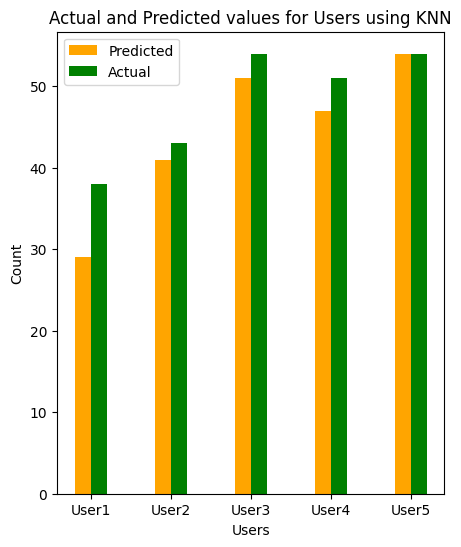

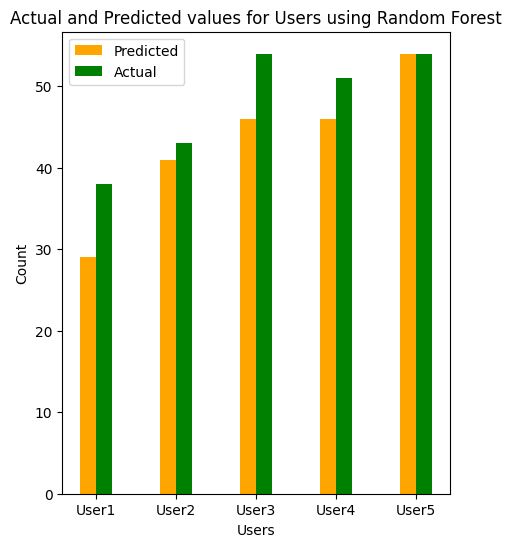

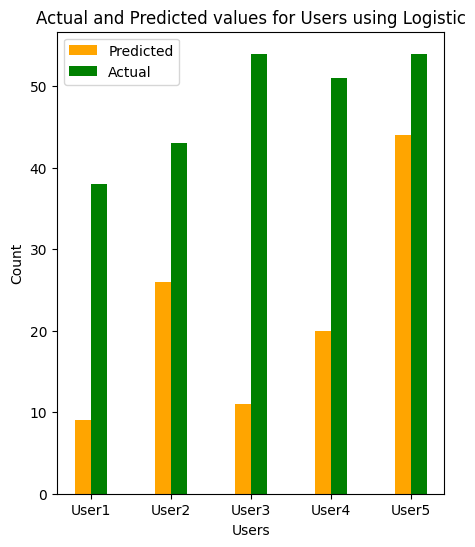

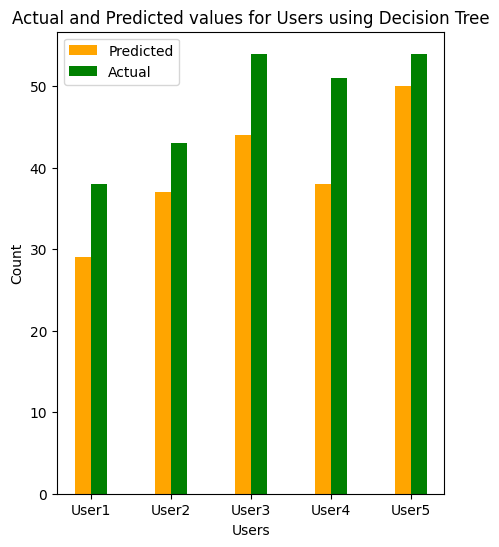

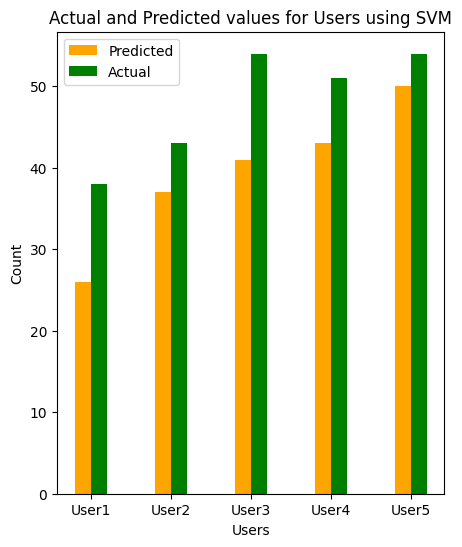

In [ ]:
import matplotlib.pyplot as plt

# Define the list of users and the list of predicted values
start = 0  
end = 5  

# plot all models predicted values in respect to the actual values
for i in range(5):  # loop through each machine learning model
  plt.figure(figsize=(5,6))  
  
  # extract sublist of predicted values for current machine learning model
  predicted_values = pred_values[start:end]  
  start += 5  
  end += 5 
  
  # Define the list of support values (i.e., actual values)
  actual_values = [38, 43, 54, 51, 54]
  
  # Create a bar plot with predicted and actual values
  X_axis = np.arange(5)
  # Predicted values are plotted with an offset of -0.2 on x-axis
  plt.bar(X_axis - 0.1, predicted_values, 0.2, label = 'Predicted', color="orange")
  # Actual values are plotted with an offset of +0.2 on x-axis
  plt.bar(X_axis + 0.1, actual_values, 0.2, label = 'Actual', color="green")

  plt.xticks(X_axis, dic)  
  plt.xlabel('Users')  
  plt.ylabel('Count') 
  plt.title(f'Actual and Predicted values for Users using {my_titles[i]}') 
  plt.legend()  
  plt.show()  

Text(0, 0.5, 'F1 Score')

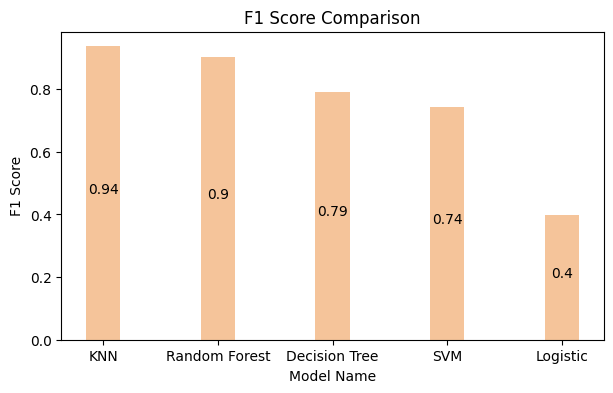

In [ ]:
#plotting the f1-score comparison
x = []
my_titles = ["KNN","Random Forest","Decision Tree","SVM","Logistic"]
for i in range(len(outputss)):
  x.append(f1_score(y_test, outputss[i], average='weighted'))

x.sort(reverse=True)
plt.figure(figsize=(7,4)) 
plt.title("F1 Score Comparison")
plt.bar(my_titles,x,0.3,color = "#f5c49a")
addlabels(my_titles,x)
plt.xlabel("Model Name")
plt.ylabel("F1 Score")

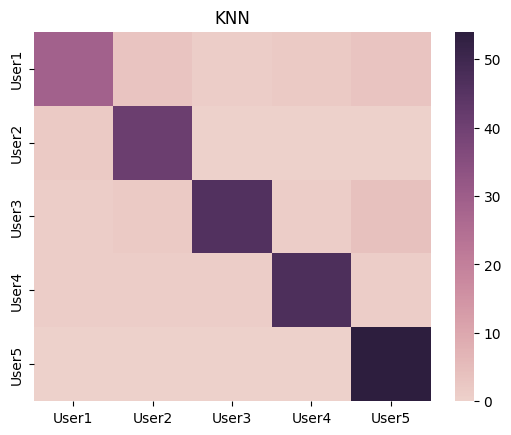

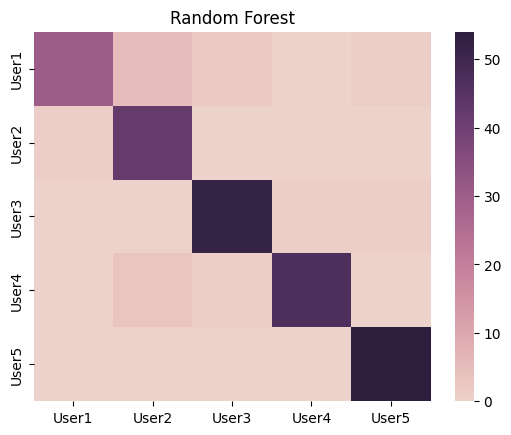

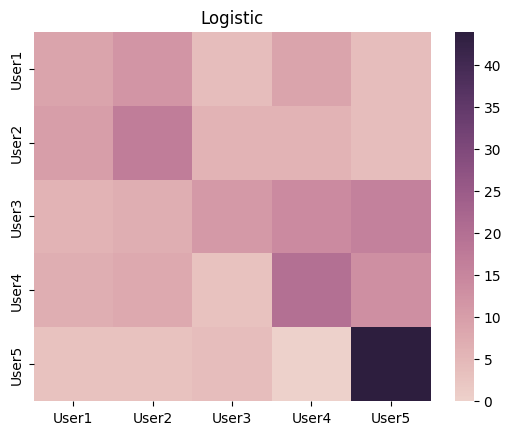

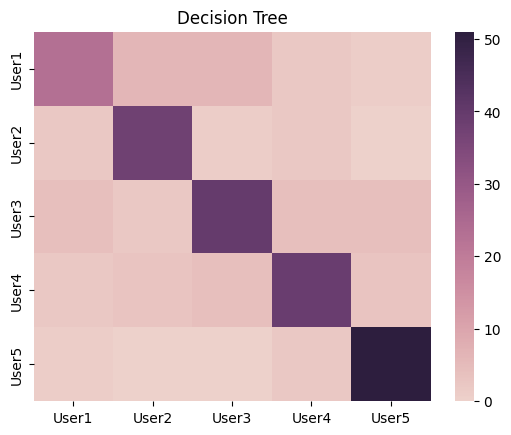

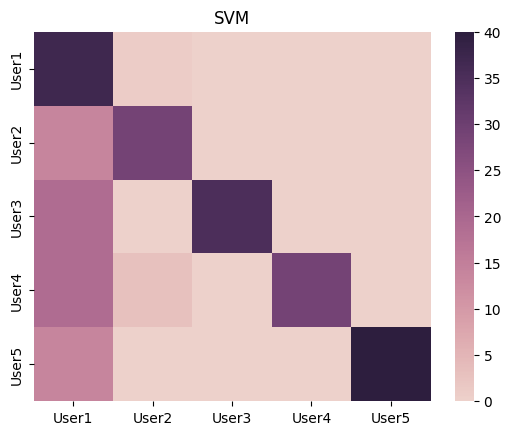

In [ ]:
#ploting heatmap 
for i in range(len(outputss)):
  df = pd.DataFrame(confusion_matrix(y_test, outputss[i]))
  df = df.rename(columns=lambda x: str(dic[x]))
  df = df.rename(index=lambda x: str(dic[x]))
  plt.figure()
  plt.title(my_titles[i])
  sns.heatmap(df,cmap=sns.cubehelix_palette(as_cmap=True))
  plt.show()